# Sign Language MNIST

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Loading the training dataset. In this dataset instead of images, we have excel file which contains the pixel values of images.

In [3]:
df_train = pd.read_csv(r"\sign_mnist_train.csv")

df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
# Same goes for testing data.

In [5]:
df_test = pd.read_csv(r"\sign_mnist_test.csv")

df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [6]:
df_train.describe()    #by this we can see the max and min values of each columns

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.287552,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [7]:
df_train.info()     #here we can also see the no of data we have, i.e 2755 images to train our model, 
                    #785 columns with value for each pixel

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [8]:
df_test.info()      #also same functtion for the testing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB


In [9]:
train_label = df_train["label"]
test_label = df_test["label"]

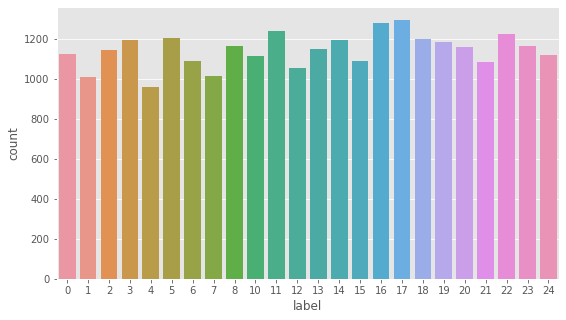

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure(figsize =(9,5))
sns.countplot(x= df_train['label'],data = df_train)
plt.show()

In [11]:
df_train.drop("label",axis=1,inplace=True)
df_train.head(2)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149


In [12]:
df_test.drop("label",axis=1,inplace=True)
df_test.head(2)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,149,149,150,150,150,151,151,150,151,152,...,138,148,127,89,82,96,106,112,120,107
1,126,128,131,132,133,134,135,135,136,138,...,47,104,194,183,186,184,184,184,182,180


In [13]:
x_train = df_train.values

x_train

array([[107, 118, 127, ..., 204, 203, 202],
       [155, 157, 156, ..., 103, 135, 149],
       [187, 188, 188, ..., 195, 194, 195],
       ...,
       [174, 174, 174, ..., 202, 200, 200],
       [177, 181, 184, ...,  64,  87,  93],
       [179, 180, 180, ..., 205, 209, 215]], dtype=int64)

In [14]:
x_train = x_train.reshape(-1,28,28,1)

x_test = df_test.values.reshape(-1,28,28,1)

In [15]:
from keras.models import Sequential
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Flatten,Dense,Dropout,MaxPool2D,Conv2D

In [16]:
lb = LabelBinarizer()
y_train = lb.fit_transform(train_label)
y_test = lb.fit_transform(test_label)

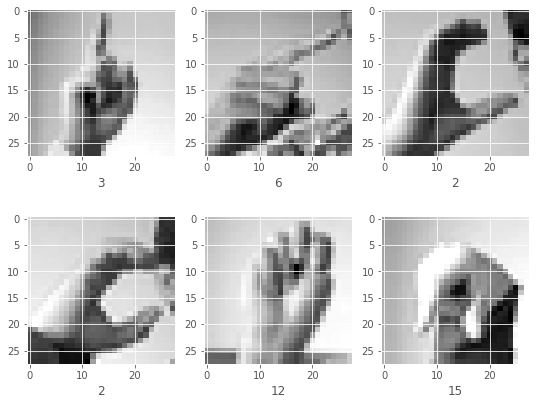

In [17]:
plt.figure(figsize=(9,7))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(x_train[i],cmap='gray')
    plt.xlabel(np.argmax(y_train[i]))
    
plt.show()     # visualizing the images 

In [18]:
train_datagen = ImageDataGenerator(rescale=(1./255),
                                    rotation_range = 30,
                                    width_shift_range = 0.2,
                                    height_shift_range =0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=(1./255))

In [19]:
from tensorflow.keras import Sequential

model = Sequential()

model.add(Conv2D(32,(3,3),padding = 'same',input_shape=(28,28,1),activation = 'relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64,(3,3),padding = 'same',activation = 'relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(128,(3,3),padding = 'same',activation = 'relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(24,activation="softmax"))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0

In [21]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy')

In [22]:
history = model.fit_generator(generator = train_datagen.flow(x_train,y_train,batch_size=32),
                              validation_data = val_datagen.flow(x_test,y_test),epochs=15,verbose=1)

C:\Users\hruti\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
858/858 [==============================] - 36s 41ms/step - loss: 2.8859 - accuracy: 0.1217 - val_loss: 1.4805 - val_accuracy: 0.4668
Epoch 2/15
858/858 [==============================] - 30s 35ms/step - loss: 1.5351 - accuracy: 0.4874 - val_loss: 0.6499 - val_accuracy: 0.7651
Epoch 3/15
858/858 [==============================] - 33s 38ms/step - loss: 0.9702 - accuracy: 0.6680 - val_loss: 0.4997 - val_accuracy: 0.8353
Epoch 4/15
858/858 [==============================] - 33s 39ms/step - loss: 0.7016 - accuracy: 0.7597 - val_loss: 0.3128 - val_accuracy: 0.8933
Epoch 5/15
858/858 [==============================] - 34s 40ms/step - loss: 0.5437 - accuracy: 0.8142 - val_loss: 0.2275 - val_accuracy: 0.9275
Epoch 6/15
858/858 [==============================] - 33s 39ms/step - loss: 0.4368 - accuracy: 0.8480 - val_loss: 0.3028 - val_accuracy: 0.8988
Epoch 7/15
858/858 [==============================] - 37s 43ms/step - loss: 0.3741 - accuracy: 0.8741 - val_loss: 0.1899 - val_accuracy:

In [23]:
import warnings
warnings.filterwarnings("ignore")
loss,acc = model.evaluate_generator(val_datagen.flow(x_test,y_test))
print(f"Accuracy: {acc*100}")
print(f"Loss: {loss}")

Accuracy: 99.23312664031982
Loss: 0.024974476546049118


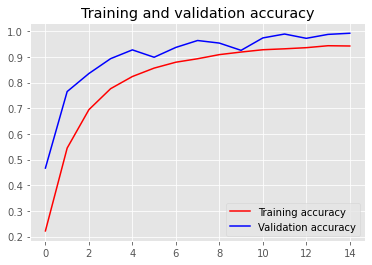

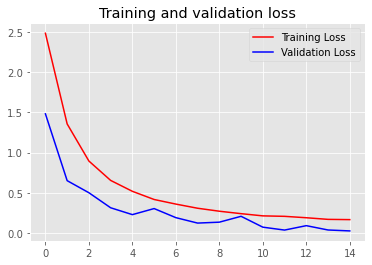

In [24]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()


plt.show()